# Importing Libraries and Loading data 


In [1]:
#importing the required libraries for data manipulation
import numpy as np
import pandas as pd

from pandas import Series, DataFrame


In [2]:
# importing libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

In [3]:
# reading the data file using the pandas library
airbnb_1= pd.read_csv('AB_NYC_2019.csv')

In [4]:
# displaying the head of the .csv file 
airbnb_1.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
#checking the data types of column values
airbnb_1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Manipulating and Cleaning Data 

In [6]:
#here we are dropping those columns which are not required or provide nomeaning to the data 

airbnb_1.drop(['id','host_name','last_review'], axis=1, inplace= True)

In [7]:
#examining the changes 
airbnb_1.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
#checking the null values in each column and taking the sum of total null values 
airbnb_1.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#replace all the name column null values with NaN
airbnb_1['name'] = airbnb_1['name'].fillna(value = 'NaN')

In [10]:
#Examining the changes
airbnb_1.isnull().sum()

name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# checking if null values still exist , 
#expecting true result as we dint fill any values for the column reviews_per_month
airbnb_1.isnull().values.any()

True

In [12]:
# dropping those rows where the name column has NaN value 
airbnb_1.drop(airbnb_1.loc[airbnb_1['name']=='NaN'].index,inplace= True)

In [13]:
#checking the result 
airbnb_1.isnull().sum()

name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [28]:
#Checking any duplicate value 
airbnb_1.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
48865    False
48866    False
48867    False
48868    False
48869    False
48870    False
48871    False
48872    False
48873    False
48874    False
48875    False
48876    False
48877    False
48878    False
48879    False
48880    False
48881    False
48882    False
48883    False
48884    False
48885    False
48886    False
48887    False
48888    False
48889    False
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48879, dtype: bool

In [29]:
#dropping duplicates if present 

airbnb_1.drop_duplicates()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [14]:
#identifying the unique values in the neighbourhood_group column 
airbnb_1.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
#identifying the unique values in the room_type column
airbnb_1.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
#top bnb with the higeest number of votes


top_bnb= airbnb_1.name.value_counts().head(5)

In [17]:
top_bnb

Hillside Hotel                  18
Home away from home             17
New york Multi-unit building    16
Brooklyn Apartment              12
Private Room                    11
Name: name, dtype: int64

# Exploring and Visualizing Data 

In [18]:
#setting a figure size for the visialization
plt.rcParams['figure.figsize'] = (10, 10)

[Text(0, 0, 'Hillside Hotel'),
 Text(0, 0, 'Home away from home'),
 Text(0, 0, 'New york Multi-unit building'),
 Text(0, 0, 'Brooklyn Apartment'),
 Text(0, 0, 'Private Room')]

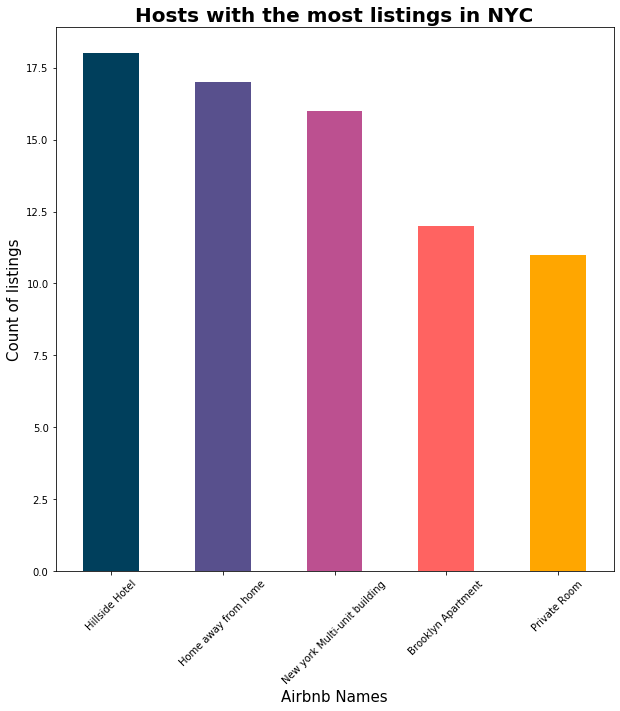

In [19]:
# creating a bar plot to see visually the higest listings of airbnbs in NYC 
viz_1=top_bnb.plot(kind='bar',color=('#003f5c','#58508d','#bc5090','#ff6361','#ffa600'))
viz_1.set_title('Hosts with the most listings in NYC',fontsize=20,weight='bold')
viz_1.set_ylabel('Count of listings',fontsize=15)
viz_1.set_xlabel('Airbnb Names', fontsize=15)
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45,fontsize=10)
# rc('font', weight='bold')

In [22]:
#calculating the average price if airbnbs in NYC
airbnb_1['price'].mean()

152.72235520366618

In [23]:
# Filtering bnbs which are less than the mean value 
airbnb_filtered= airbnb_1[airbnb_1.price<=153]
airbnb_filtered.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0


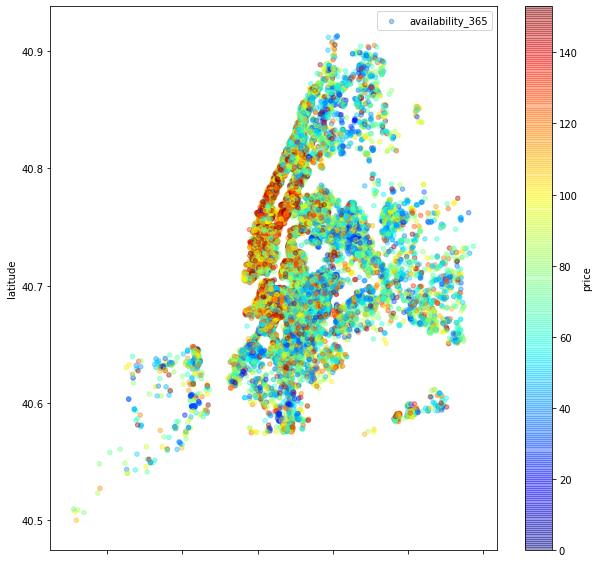

In [31]:
# scatter plot using the longitute and latitute column for bnb costing less than the mean value
visual1=airbnb_filtered.plot(kind='scatter', x='longitude',  y='latitude',
                             label='availability_365', c='price',
                             cmap=plt.get_cmap('jet'), colorbar=True, 
                             alpha=0.4, figsize=(10,10))

In [25]:
#filtering those bnb which are more than the mean value 
airbnb_filtered1=airbnb_1[airbnb_1.price>153]
#examining the result 
airbnb_filtered1.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
16,Perfect for Your Parents + Garden,17571,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,1.72,1,321
19,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
20,Sweet and Spacious Brooklyn Loft,21207,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0


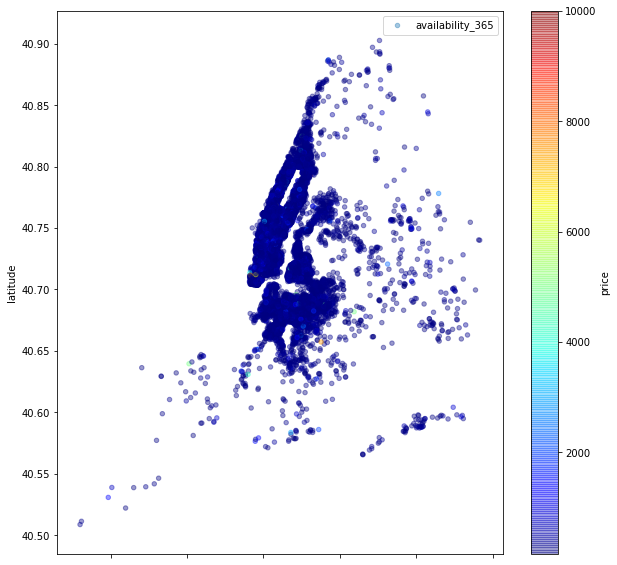

In [32]:
#scatter plot using the longitude and latitude for bnbs more than mean value 
visual2=airbnb_filtered1.plot(kind='scatter', x='longitude', y='latitude', 
                              label='availability_365', c='price',
                              cmap=plt.get_cmap('jet'), colorbar=True, 
                              alpha=0.4, figsize=(10,10))

Text(0.5, 1.0, 'Price Distribution for airbnb based on Neighbourhood Groups')

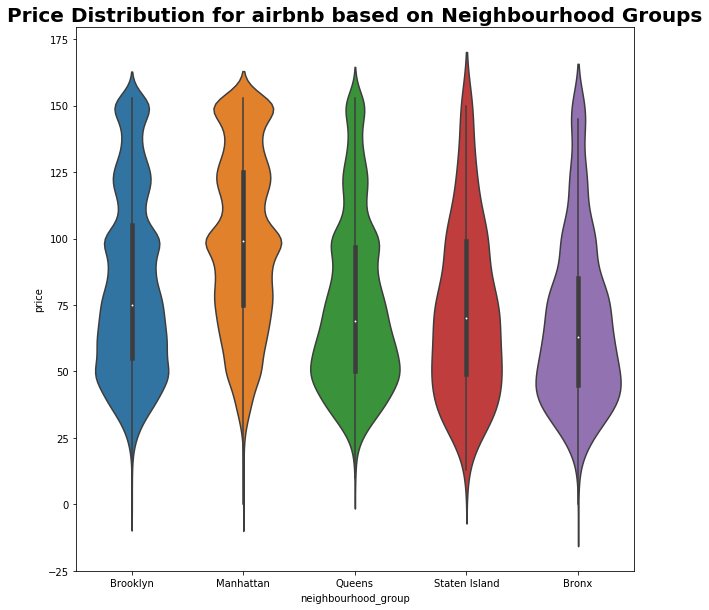

In [27]:
#using violin plot i want to show the density distribution of prices in the specific neighbourhood areas 
visual3=sns.violinplot(data = airbnb_filtered,x='neighbourhood_group',y='price')
#setting the title of the visual
visual3.set_title('Price Distribution for airbnb based on Neighbourhood Groups',
                  fontsize=20,weight='bold')

Text(0.5, 0, 'Neighbourhood  in NYC')

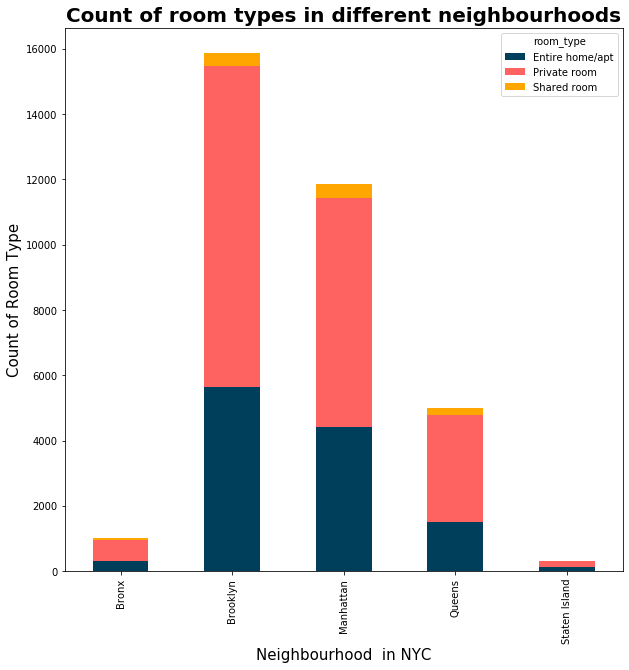

In [75]:
#Creating a stacked column bar cahrt to see the count of types of room in different neighbourhoods of NYC
stck1= airbnb_filtered.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack('room_type').fillna(0)
stck1.plot(kind='bar',color=('#003f5c','#ff6361','#ffa600'), stacked=True)
#Assigning the title, x-y axis label
plt.title('Count of room types in different neighbourhoods',
           fontsize=20, weight= 'bold')
plt.ylabel('Count of Room Type', fontsize=15)
plt.xlabel('Neighbourhood  in NYC',fontsize=15)



